## DEPENDENCIES AND CSV UPLOAD

In [1]:
# Import dependencies and file
# The dataset was obtained from HR Source.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
file_path = Path("Employee_Attrition.csv")

In [2]:
# Read csv file in to dataframe
df = pd.read_csv(file_path)
df.head()

,Unnamed: 0,EMPID,Leaver(Y/N),Age,Gender,Race_Ethnicity,Job_Level,Annual_Salary,Position,CurrentPayGrade,TimewithCompany(yrs),DistancetoWork(miles),Hybrid/Remote,Dept_Name,Status,Salary_Max%
0,0,A0ZU,No,35,Female,Unspecified,Administrative Support Workers,20.8,Benefits and Payroll Coordinator,11,0.33,0.00,Remote,HR,Full Time,0.00
1,1,A0YO,Yes,31,Female,Unspecified,First/Mid-Level Officials and Managers,20.8,Camp Director,7,0.92,45.21,Hybrid,Outdoor Education,Full Time,0.00
2,2,A03Y,Yes,63,Male,Black or African American,Laborers and Helpers,"9,547.20",Guest Services and Maintenance Specialist - PT,13,3.58,41.49,Hybrid,Risk and Facilities,Part Time,0.21
3,3,A13D,Yes,29,Female,White,Sales Workers,"10,400.00",Customer Service Representative - PT,13,1.25,21.94,Hybrid,Badge & Sash,Part Time,0.23
4,4,A1FN,Yes,33,Female,Black or African American,Sales Workers,"10,400.00",Customer Service Representative - PT,13,7.50,0.00,Remote,Badge & Sash,Part Time,0.23


## CLEAN DATA

In [3]:
# drop unwanted columns
employee_df = df.drop(["EMPID","Status","Unnamed: 0", "Salary_Max%"], axis=1)
employee_df

,Leaver(Y/N),Age,Gender,Race_Ethnicity,Job_Level,Annual_Salary,Position,CurrentPayGrade,TimewithCompany(yrs),DistancetoWork(miles),Hybrid/Remote,Dept_Name
0,No,35,Female,Unspecified,Administrative Support Workers,20.8,Benefits and Payroll Coordinator,11,0.33,0.00,Remote,HR
1,Yes,31,Female,Unspecified,First/Mid-Level Officials and Managers,20.8,Camp Director,7,0.92,45.21,Hybrid,Outdoor Education
2,Yes,63,Male,Black or African American,Laborers and Helpers,"9,547.20",Guest Services and Maintenance Specialist - PT,13,3.58,41.49,Hybrid,Risk and Facilities
3,Yes,29,Female,White,Sales Workers,"10,400.00",Customer Service Representative - PT,13,1.25,21.94,Hybrid,Badge & Sash
4,Yes,33,Female,Black or African American,Sales Workers,"10,400.00",Customer Service Representative - PT,13,7.50,0.00,Remote,Badge & Sash
...,...,...,...,...,...,...,...,...,...,...,...,...
359,No,56,Female,Black or African American,Executive/Senior-Level Officials and Managers,"118,560.00",Sr Director - Membership,3,7.00,29.31,Hybrid,Membership
360,No,49,Male,White,Executive/Senior-Level Officials and Managers,"136,735.82",Sr Director - Marketing,3,3.33,13.28,Hybrid,Marketing
361,Yes,23,Female,White,Service Workers,"145,600.00",Junior Program Facilitator,0,13.50,91.86,Hybrid,Program Support
362,Yes,24,Female,White,Service Workers,"145,600.00",Junior Program Facilitator,0,8.17,12.50,Hybrid,Program Support


In [4]:
# find data types
employee_df.dtypes

Leaver(Y/N)               object
Age                        int64
Gender                    object
Race_Ethnicity            object
Job_Level                 object
Annual_Salary             object
Position                  object
CurrentPayGrade            int64
TimewithCompany(yrs)     float64
DistancetoWork(miles)    float64
Hybrid/Remote             object
Dept_Name                 object
dtype: object

In [5]:
# change Annual_Salary to int64
# remove commas
employee_df["Annual_Salary"] = employee_df["Annual_Salary"].str.replace(',','')
employee_df["Annual_Salary"] = employee_df["Annual_Salary"].astype(str).astype(float)
employee_df.dtypes

Leaver(Y/N)               object
Age                        int64
Gender                    object
Race_Ethnicity            object
Job_Level                 object
Annual_Salary            float64
Position                  object
CurrentPayGrade            int64
TimewithCompany(yrs)     float64
DistancetoWork(miles)    float64
Hybrid/Remote             object
Dept_Name                 object
dtype: object

In [6]:
# correlation matrix
corr_matrix=employee_df.corr()
corr_matrix

,Age,Annual_Salary,CurrentPayGrade,TimewithCompany(yrs),DistancetoWork(miles)
Age,1.000000,0.171344,-0.091277,0.094121,-0.050582
Annual_Salary,0.171344,1.000000,-0.561421,0.049571,-0.054010
CurrentPayGrade,-0.091277,-0.561421,1.000000,-0.035243,0.072700
TimewithCompany(yrs),0.094121,0.049571,-0.035243,1.000000,0.047763
DistancetoWork(miles),-0.050582,-0.054010,0.072700,0.047763,1.000000


In [7]:
# access data set numerical values
employee_df.describe()

,Age,Annual_Salary,CurrentPayGrade,TimewithCompany(yrs),DistancetoWork(miles)
count,364.000000,364.000000,364.000000,364.000000,364.000000
mean,41.123626,44342.721319,9.104396,4.354093,34.422418
std,12.010720,21351.626114,3.208131,5.177460,166.416179
min,19.000000,20.800000,0.000000,0.000000,0.000000
25%,31.000000,33978.555000,7.000000,0.920000,0.000000
50%,39.500000,38472.330000,10.000000,2.625000,9.765000
75%,50.000000,51562.515000,12.000000,5.920000,21.047500
max,72.000000,145600.000000,13.000000,30.830000,2123.460000


In [8]:
# access non numerical values
employee_df.describe(include=[object])

,Leaver(Y/N),Gender,Race_Ethnicity,Job_Level,Position,Hybrid/Remote,Dept_Name
count,364,364,364,364,364,364,364
unique,2,3,7,8,143,2,16
top,Yes,Female,Black or African American,Professionals,Area Executive,Hybrid,Membership
freq,245,325,159,86,43,242,116


In [9]:
employee_df = employee_df[employee_df.Annual_Salary > 100]
employee_df

,Leaver(Y/N),Age,Gender,Race_Ethnicity,Job_Level,Annual_Salary,Position,CurrentPayGrade,TimewithCompany(yrs),DistancetoWork(miles),Hybrid/Remote,Dept_Name
2,Yes,63,Male,Black or African American,Laborers and Helpers,9547.20,Guest Services and Maintenance Specialist - PT,13,3.58,41.49,Hybrid,Risk and Facilities
3,Yes,29,Female,White,Sales Workers,10400.00,Customer Service Representative - PT,13,1.25,21.94,Hybrid,Badge & Sash
4,Yes,33,Female,Black or African American,Sales Workers,10400.00,Customer Service Representative - PT,13,7.50,0.00,Remote,Badge & Sash
5,Yes,29,Female,White,Administrative Support Workers,11700.00,Production Assistant,11,1.00,23.34,Hybrid,Marketing
6,Yes,59,Female,White,Sales Workers,12854.40,Lead Customer Service Representative,13,11.00,52.52,Hybrid,Badge & Sash
...,...,...,...,...,...,...,...,...,...,...,...,...
359,No,56,Female,Black or African American,Executive/Senior-Level Officials and Managers,118560.00,Sr Director - Membership,3,7.00,29.31,Hybrid,Membership
360,No,49,Male,White,Executive/Senior-Level Officials and Managers,136735.82,Sr Director - Marketing,3,3.33,13.28,Hybrid,Marketing
361,Yes,23,Female,White,Service Workers,145600.00,Junior Program Facilitator,0,13.50,91.86,Hybrid,Program Support
362,Yes,24,Female,White,Service Workers,145600.00,Junior Program Facilitator,0,8.17,12.50,Hybrid,Program Support


In [10]:
#remove max distance from work
employee_df = employee_df.rename(columns={"DistancetoWork(miles)": "DistancetoWork"})
employee_df

,Leaver(Y/N),Age,Gender,Race_Ethnicity,Job_Level,Annual_Salary,Position,CurrentPayGrade,TimewithCompany(yrs),DistancetoWork,Hybrid/Remote,Dept_Name
2,Yes,63,Male,Black or African American,Laborers and Helpers,9547.20,Guest Services and Maintenance Specialist - PT,13,3.58,41.49,Hybrid,Risk and Facilities
3,Yes,29,Female,White,Sales Workers,10400.00,Customer Service Representative - PT,13,1.25,21.94,Hybrid,Badge & Sash
4,Yes,33,Female,Black or African American,Sales Workers,10400.00,Customer Service Representative - PT,13,7.50,0.00,Remote,Badge & Sash
5,Yes,29,Female,White,Administrative Support Workers,11700.00,Production Assistant,11,1.00,23.34,Hybrid,Marketing
6,Yes,59,Female,White,Sales Workers,12854.40,Lead Customer Service Representative,13,11.00,52.52,Hybrid,Badge & Sash
...,...,...,...,...,...,...,...,...,...,...,...,...
359,No,56,Female,Black or African American,Executive/Senior-Level Officials and Managers,118560.00,Sr Director - Membership,3,7.00,29.31,Hybrid,Membership
360,No,49,Male,White,Executive/Senior-Level Officials and Managers,136735.82,Sr Director - Marketing,3,3.33,13.28,Hybrid,Marketing
361,Yes,23,Female,White,Service Workers,145600.00,Junior Program Facilitator,0,13.50,91.86,Hybrid,Program Support
362,Yes,24,Female,White,Service Workers,145600.00,Junior Program Facilitator,0,8.17,12.50,Hybrid,Program Support


In [11]:
# remove outlier for Distance to Work
employee_df = employee_df[employee_df.DistancetoWork < 500]
employee_df

,Leaver(Y/N),Age,Gender,Race_Ethnicity,Job_Level,Annual_Salary,Position,CurrentPayGrade,TimewithCompany(yrs),DistancetoWork,Hybrid/Remote,Dept_Name
2,Yes,63,Male,Black or African American,Laborers and Helpers,9547.20,Guest Services and Maintenance Specialist - PT,13,3.58,41.49,Hybrid,Risk and Facilities
3,Yes,29,Female,White,Sales Workers,10400.00,Customer Service Representative - PT,13,1.25,21.94,Hybrid,Badge & Sash
4,Yes,33,Female,Black or African American,Sales Workers,10400.00,Customer Service Representative - PT,13,7.50,0.00,Remote,Badge & Sash
5,Yes,29,Female,White,Administrative Support Workers,11700.00,Production Assistant,11,1.00,23.34,Hybrid,Marketing
6,Yes,59,Female,White,Sales Workers,12854.40,Lead Customer Service Representative,13,11.00,52.52,Hybrid,Badge & Sash
...,...,...,...,...,...,...,...,...,...,...,...,...
359,No,56,Female,Black or African American,Executive/Senior-Level Officials and Managers,118560.00,Sr Director - Membership,3,7.00,29.31,Hybrid,Membership
360,No,49,Male,White,Executive/Senior-Level Officials and Managers,136735.82,Sr Director - Marketing,3,3.33,13.28,Hybrid,Marketing
361,Yes,23,Female,White,Service Workers,145600.00,Junior Program Facilitator,0,13.50,91.86,Hybrid,Program Support
362,Yes,24,Female,White,Service Workers,145600.00,Junior Program Facilitator,0,8.17,12.50,Hybrid,Program Support


In [12]:
employee_df.index

Int64Index([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
            ...
            354, 355, 356, 357, 358, 359, 360, 361, 362, 363],
           dtype='int64', length=359)

In [13]:
# remove service workers
# employee_df.loc[employee_df['Job_Level'] == ' Service Workers']
#indexes 41, 361, 362, 363
employee_df = employee_df.drop([41, 361, 362, 363])
employee_df

,Leaver(Y/N),Age,Gender,Race_Ethnicity,Job_Level,Annual_Salary,Position,CurrentPayGrade,TimewithCompany(yrs),DistancetoWork,Hybrid/Remote,Dept_Name
2,Yes,63,Male,Black or African American,Laborers and Helpers,9547.20,Guest Services and Maintenance Specialist - PT,13,3.58,41.49,Hybrid,Risk and Facilities
3,Yes,29,Female,White,Sales Workers,10400.00,Customer Service Representative - PT,13,1.25,21.94,Hybrid,Badge & Sash
4,Yes,33,Female,Black or African American,Sales Workers,10400.00,Customer Service Representative - PT,13,7.50,0.00,Remote,Badge & Sash
5,Yes,29,Female,White,Administrative Support Workers,11700.00,Production Assistant,11,1.00,23.34,Hybrid,Marketing
6,Yes,59,Female,White,Sales Workers,12854.40,Lead Customer Service Representative,13,11.00,52.52,Hybrid,Badge & Sash
...,...,...,...,...,...,...,...,...,...,...,...,...
356,Yes,44,Female,White,Executive/Senior-Level Officials and Managers,110333.60,Sr Director - Volunteer Support,4,3.33,18.52,Hybrid,Program Support
357,No,48,Female,White,First/Mid-Level Officials and Managers,111670.78,Director - Accounting and Finance,4,0.42,12.94,Hybrid,Finance
358,Yes,50,Female,Black or African American,Executive/Senior-Level Officials and Managers,118450.02,Sr Director - Membership,3,0.00,0.00,Remote,Membership
359,No,56,Female,Black or African American,Executive/Senior-Level Officials and Managers,118560.00,Sr Director - Membership,3,7.00,29.31,Hybrid,Membership


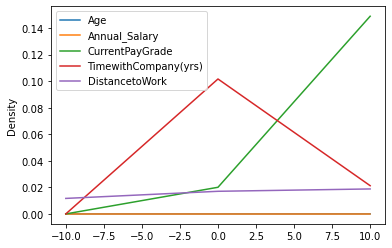

In [14]:
# normal distribution
ax = employee_df.plot.kde(ind=[-10, 0, 10])


In [15]:
#Convert columns with 2 or less unique values
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

# Label encoding the 'Status' column
employee_df['Hybrid/Remote'] = LabelEncoder().fit_transform(employee_df['Hybrid/Remote'])
employee_df['Hybrid/Remote'].value_counts()

0    234
1    121
Name: Hybrid/Remote, dtype: int64

In [16]:
target = employee_df["Leaver(Y/N)"].values
# Converting output labels to 0 and 1
y = LabelEncoder().fit_transform(target)
y

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,

In [17]:
# Convert remaining categorical data to numerical in dataframe
employee_df2 = employee_df.drop(["Leaver(Y/N)"], axis=1)
X = pd.get_dummies(employee_df2, drop_first=True)
print(X.columns)
X

Index(['Age', 'Annual_Salary', 'CurrentPayGrade', 'TimewithCompany(yrs)',
       'DistancetoWork', 'Hybrid/Remote', 'Gender_ Male',
       'Gender_ Unspecified', 'Race_Ethnicity_ Asian',
       'Race_Ethnicity_ Black or African American',
       ...
       'Dept_Name_IT', 'Dept_Name_Marketing', 'Dept_Name_Membership',
       'Dept_Name_Mission Delivery', 'Dept_Name_Outdoor Education',
       'Dept_Name_Outdoor Program', 'Dept_Name_Outdoor Property',
       'Dept_Name_Product Programs', 'Dept_Name_Program Support',
       'Dept_Name_Risk and Facilities'],
      dtype='object', length=174)


,Age,Annual_Salary,CurrentPayGrade,TimewithCompany(yrs),DistancetoWork,Hybrid/Remote,Gender_ Male,Gender_ Unspecified,Race_Ethnicity_ Asian,Race_Ethnicity_ Black or African American,...,Dept_Name_IT,Dept_Name_Marketing,Dept_Name_Membership,Dept_Name_Mission Delivery,Dept_Name_Outdoor Education,Dept_Name_Outdoor Program,Dept_Name_Outdoor Property,Dept_Name_Product Programs,Dept_Name_Program Support,Dept_Name_Risk and Facilities
2,63,9547.20,13,3.58,41.49,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,29,10400.00,13,1.25,21.94,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,10400.00,13,7.50,0.00,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,29,11700.00,11,1.00,23.34,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,59,12854.40,13,11.00,52.52,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,44,110333.60,4,3.33,18.52,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
357,48,111670.78,4,0.42,12.94,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
358,50,118450.02,3,0.00,0.00,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
359,56,118560.00,3,7.00,29.31,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [18]:
# Scale the data
scaler = StandardScaler()
X_scaled_data = scaler.fit_transform(X)
print(X_scaled_data[0:10])

[[ 1.80369665 -1.79651259  1.23407501 ... -0.15183792 -0.33071891
   5.34633831]
 [-1.0358258  -1.75191398  1.23407501 ... -0.15183792 -0.33071891
  -0.18704391]
 [-0.70176433 -1.75191398  1.23407501 ... -0.15183792 -0.33071891
  -0.18704391]
 ...
 [-0.86879506 -1.57107207  1.23407501 ... -0.15183792 -0.33071891
  -0.18704391]
 [-0.11715677 -1.51151662  1.23407501 ... -0.15183792 -0.33071891
   5.34633831]
 [ 0.63448153 -1.48704177  0.58600307 ... -0.15183792 -0.33071891
  -0.18704391]]


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(X_scaled_data, y, test_size=.25, random_state=42) 

print("Number of X_train transactions: ", X_train.shape)
print("Number of y_train transactions: ", y_train.shape)
print("Number of X_test transactions: ", X_test.shape)
print("Number of y_test transactions: ", y_test.shape)

Number of X_train transactions:  (266, 174)
Number of y_train transactions:  (266,)
Number of X_test transactions:  (89, 174)
Number of y_test transactions:  (89,)


In [26]:
# Train a Random Forest Classifier model and print the model score
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(class_weight='balanced', max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=175,
                       ).fit(X_train, y_train)
# {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 175} random_state=7

In [27]:
print(f'Training Score: {clf.score(X_train, y_train)}')
print(f'Testing Score: {clf.score(X_test, y_test)}')

Training Score: 0.9962406015037594
Testing Score: 0.6629213483146067


In [28]:
# Create Confusion Matrix of the predicted vs the actual outcomes
from sklearn.metrics import confusion_matrix

y_true = y_test
y_pred = clf.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[13, 20],
       [10, 46]], dtype=int64)

In [29]:
# Create the Classification Report and compare
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.39      0.46        33
           1       0.70      0.82      0.75        56

    accuracy                           0.66        89
   macro avg       0.63      0.61      0.61        89
weighted avg       0.65      0.66      0.65        89



In [ ]:
from sklearn.model_selection import GridSearchCV

rf_classifier = RandomForestClassifier(class_weight = "balanced",
                                       random_state=7)
param_grid = {'n_estimators': [50, 75, 100, 125, 150, 175],
              'min_samples_split':[2,4,6,8,10],
              'min_samples_leaf': [1, 2, 3, 4],
              'max_depth': [5, 10, 15, 20, 25]}

grid_obj = GridSearchCV(rf_classifier,
                        return_train_score=True,
                        param_grid=param_grid,
                        scoring='roc_auc',
                        cv=10)

grid_fit = grid_obj.fit(X_train, y_train)
rf_opt = grid_fit.best_estimator_

print('='*20)
print("best params: " + str(grid_obj.best_estimator_))
print("best params: " + str(grid_obj.best_params_))
print('best score:', grid_obj.best_score_)
print('='*20)